# CIS 678 Machine Learning Project 4(a) - Boolean Function Perceptron
Tyler Reed

NOTE: To view all output, use nbviewer link below.
https://nbviewer.org/github/treed8887/ML/blob/main/CIS678-Project4a-BoolPerceptron.ipynb

### Overview
--------------
Four linearly-separable, two-input Boolean functions, (AND, OR, NAND, NOR), will be modeled by a perceptron that will learn the weights of each function for classification.

### Data
---------
The data of each boolean function is within a csv file as shown below as a pandas dataframe.

In [1]:
import numpy as np
import pandas as pd
import random as rand
bool_df = pd.read_csv('/Users/Study/Downloads/CIS678/ML/Booleans.csv', sep=",", header=0)
print(bool_df)

   x1  x2  AND  OR  NAND  NOR
0   0   0    0   0     1    1
1   0   1    0   1     1    0
2   1   0    0   1     1    0
3   1   1    1   1     0    0


### Methodology
------------------
The following function is defined with one argument: `bln` as the type of boolean function to be learned. Valid input arguments are "AND", "OR", "NAND", "NOR". 

#### Activation
The activation of the perceptron uses a Sum of Products operation with a "step" function (y) as follows: 



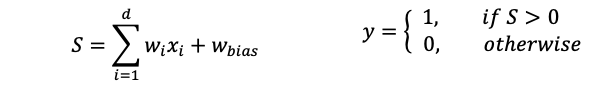

#### Learning 

After activation, if the output is not equal to the target, then the perceptron updates the weights with the following "Delta" rule:

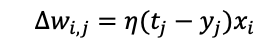

#### Termination Condition

After each instance of the training data is correctly classified, which is a total of four instances, the function stops updating the weights and outputs the final weights learned by the model.

In [27]:
def learn_bool(bln):
    # retrieve dataframe for specified boolean
    t_df = bool_df.filter(items=["x1", "x2", bln]) 
    
    # initialize weights, bias, bln types, learning rate
    wt_x1 = rand.random()
    wt_x2 = rand.random()
    wt_b = rand.random()
    b = 1
    eta = 0.25
    correct = 0 # number of correct outputs per epoch
    epoch = 0
    
    print("\033[1m"  + "Boolean Function: " + bln + "\033[0m" + "\n" + "Initial Weights: " + "\n" + "x1 wt: " + "{:.2f}".format(wt_x1) + "; " 
          + "x2 wt: " + "{:.2f}".format(wt_x2) + "; " + "bias wt: " + "{:.2f}".format(wt_b) + "\n")
    
    # iterate through instances to learn final wts
    while correct != 4:
        correct = 0
        for row in t_df.iterrows():
            x1 = row[1][0]
            x2 = row[1][1]
            t = row[1][2] 
            # calculate sum of products
            s = (wt_x1*x1 + wt_x2*x2 + wt_b*b)
            # determine output
            if s > 0:
                y = 1
            else:
                y = 0
            # is output correct?
            if y != t:
                # calculate delta to add to wts
                wt_x1 += eta*(t-y)*x1
                wt_x2 += eta*(t-y)*x2
                wt_b += eta*(t-y)*b
            else:
                correct += 1
        epoch += 1
        # print wts and no. correct after each epoch
        print("\n" + "\033[0m" + "Epoch " + str(epoch) + "\n" + "No. Correct Outputs: " + str(correct) + "\n" + "Ending Epoch Weights: " + "\n" + "x1 wt: " + "{:.2f}".format(wt_x1) + "; " 
          + "x2 wt: " + "{:.2f}".format(wt_x2) + "; " + "bias wt: " + "{:.2f}".format(wt_b) + "\n" + "\n"
             + "\n" + "*********************************************" + "\n")
        
    print("\033[1m" + "Termination Condition Met" + "\033[0m" + "\n" + "Boolean Function: " + bln + "\n" + "Solution took " +  str(epoch) + " epochs" 
          + "\n" + "\n" + "x1 wt: " + "{:.2f}".format(wt_x1) + "; " 
          + "x2 wt: " + "{:.2f}".format(wt_x2) + "; " + "bias wt: " + "{:.2f}".format(wt_b) + "\n")
    return 

### Training
-------------

The following functions are called with each of the four two-input, linearly-separable Boolean functions. Each will display the final learned weights, how many epochs required to reach termination condition and the Boolean function type learned.

In [28]:
learn_bool("AND")

Boolean Function: AND
Initial Weights: 
x1 wt: 0.79; x2 wt: 0.40; bias wt: 0.67


Epoch 1
No. Correct Outputs: 1
Ending Epoch Weights: 
x1 wt: 0.54; x2 wt: 0.15; bias wt: -0.08


*********************************************


Epoch 2
No. Correct Outputs: 1
Ending Epoch Weights: 
x1 wt: 0.54; x2 wt: 0.15; bias wt: -0.33


*********************************************


Epoch 3
No. Correct Outputs: 2
Ending Epoch Weights: 
x1 wt: 0.54; x2 wt: 0.40; bias wt: -0.33


*********************************************


Epoch 4
No. Correct Outputs: 3
Ending Epoch Weights: 
x1 wt: 0.54; x2 wt: 0.15; bias wt: -0.58


*********************************************


Epoch 5
No. Correct Outputs: 4
Ending Epoch Weights: 
x1 wt: 0.54; x2 wt: 0.15; bias wt: -0.58


*********************************************

Termination Condition Met
Boolean Function: AND
Solution took 5 epochs

x1 wt: 0.54; x2 wt: 0.15; bias wt: -0.58



In [23]:
learn_bool("OR")

Boolean Function: OR
Initial Weights: 
x1 wt: 0.53; x2 wt: 0.85; bias wt: 0.49


Epoch 1
No. Correct Outputs: 3
x1 wt: 0.53
x2 wt: 0.85
bias wt: 0.24

*********************************************


Epoch 2
No. Correct Outputs: 3
x1 wt: 0.53
x2 wt: 0.85
bias wt: -0.01

*********************************************


Epoch 3
No. Correct Outputs: 4
x1 wt: 0.53
x2 wt: 0.85
bias wt: -0.01

*********************************************

Termination Condition Met
Boolean Function: OR
Solution took 3 epochs

x1 wt: 0.53; x2 wt: 0.85; bias wt: -0.01



In [24]:
learn_bool("NAND")

Boolean Function: NAND
Initial Weights: 
x1 wt: 0.75; x2 wt: 0.02; bias wt: 0.73


Epoch 1
No. Correct Outputs: 3
x1 wt: 0.50
x2 wt: -0.23
bias wt: 0.48

*********************************************


Epoch 2
No. Correct Outputs: 3
x1 wt: 0.25
x2 wt: -0.48
bias wt: 0.23

*********************************************


Epoch 3
No. Correct Outputs: 2
x1 wt: -0.00
x2 wt: -0.48
bias wt: 0.23

*********************************************


Epoch 4
No. Correct Outputs: 2
x1 wt: -0.25
x2 wt: -0.48
bias wt: 0.23

*********************************************


Epoch 5
No. Correct Outputs: 2
x1 wt: -0.50
x2 wt: -0.48
bias wt: 0.23

*********************************************


Epoch 6
No. Correct Outputs: 1
x1 wt: -0.50
x2 wt: -0.48
bias wt: 0.48

*********************************************


Epoch 7
No. Correct Outputs: 2
x1 wt: -0.50
x2 wt: -0.73
bias wt: 0.48

*********************************************


Epoch 8
No. Correct Outputs: 3
x1 wt: -0.50
x2 wt: -0.48
bias wt: 0.73

*******

In [25]:
learn_bool("NOR")

Boolean Function: NOR
Initial Weights: 
x1 wt: 0.58; x2 wt: 0.51; bias wt: 0.97


Epoch 1
No. Correct Outputs: 1
x1 wt: 0.08
x2 wt: 0.01
bias wt: 0.22

*********************************************


Epoch 2
No. Correct Outputs: 2
x1 wt: -0.17
x2 wt: -0.24
bias wt: -0.28

*********************************************


Epoch 3
No. Correct Outputs: 3
x1 wt: -0.17
x2 wt: -0.24
bias wt: -0.03

*********************************************


Epoch 4
No. Correct Outputs: 2
x1 wt: -0.42
x2 wt: -0.24
bias wt: -0.03

*********************************************


Epoch 5
No. Correct Outputs: 3
x1 wt: -0.42
x2 wt: -0.24
bias wt: 0.22

*********************************************


Epoch 6
No. Correct Outputs: 4
x1 wt: -0.42
x2 wt: -0.24
bias wt: 0.22

*********************************************

Termination Condition Met
Boolean Function: NOR
Solution took 6 epochs

x1 wt: -0.42; x2 wt: -0.24; bias wt: 0.22

